In [52]:
# importing libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay

In [30]:
# reading data from csv file

df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
# splitting X and y

X = df.drop(['Outcome'], axis=1)
y = df.drop(['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',
             'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age'], axis=1)

In [32]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# This list will store the predicted labels of X_train
y_preds = []

def euclidean_distance(k):

  #This dictionary will store the distance between test row and train row as key.
  #It will also store the label of that test row as key.
  dist_label_dict = {}

  # This list will store the distances from a point.
  y_dist = []

  # reading the test row values.
  for r in range(0, len(X_test)):
    a_preg = X_test.iloc[r,0]
    a_gluc = X_test.iloc[r,1]
    a_bp = X_test.iloc[r,2]
    a_st = X_test.iloc[r,3]
    a_ins = X_test.iloc[r,4]
    a_bmi = X_test.iloc[r,5]
    a_dpf = X_test.iloc[r,6]
    a_age = X_test.iloc[r,7]

    # calculating distance between test row and all train rows.
    for i in range(0,len(X_train)):
      # reading the train row values.
      o_preg = X_train.iloc[i,0]
      o_gluc = X_train.iloc[i,1]
      o_bp = X_train.iloc[i,2]
      o_st = X_train.iloc[i,3]
      o_ins = X_train.iloc[i,4]
      o_bmi = X_train.iloc[i,5]
      o_dpf = X_train.iloc[i,6]
      o_age = X_train.iloc[i,7]

      # calculating sum of square of absolute distance between rows
      sum = ((o_preg - a_preg)**2 + (o_gluc - a_gluc)**2 + (o_bp - a_bp)**2 + 
        (o_st - a_st)**2 + (o_ins - a_ins)**2 + (o_bmi - a_bmi)**2 + 
        (o_dpf - a_dpf)**2 + (o_age - a_age)**2)
      
      # taking squareroot to calculate euclidean distance
      dist = sqrt(sum)

      # appending the neighbors distances in a list
      y_dist.append(dist)

      # storing the distance and the label of that row
      dist_label_dict[dist] = y_train.iloc[i,0]


    # sorting the distances
    y_dist.sort()

    # getting the class labels
    k_labels = []
    for j in range(0,k):
      distance = y_dist[j]
      output = dist_label_dict[distance]
      k_labels.append(output)
  
    # calculating max label count
    count_zero = 0
    count_one = 0
    for k in k_labels:
      if k == 0:
        count_zero += 1
      else:
        count_one += 1

    # predicting label
    if count_zero > count_one:
      label = 0
    else:
      label = 1

    # storing in y_preds to compare with y_test
    y_preds.append(label)
    



euclidean_distance(3)

In [46]:
precision_recall_fscore_support(y_test, y_preds)

(array([1.        , 0.36184211]),
 array([0.02020202, 1.        ]),
 array([0.03960396, 0.53140097]),
 array([99, 55]))

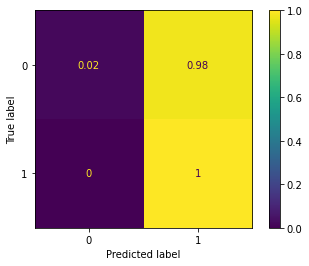

In [51]:
# Plotting confusion matrix

cm = confusion_matrix(y_test, y_preds, normalize = 'true')
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_cm.plot()